1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline
#%matplotlib notebook
#%pylab
%precision 4
np.set_printoptions(suppress=True)

from mpl_toolkits.mplot3d import Axes3D

In [41]:
#N = input("Insert N: ")
#N = int(N)
N = 1000

N01 = np.random.normal(loc=0, scale=1, size=N)
N03 = np.random.normal(loc=0, scale=3, size=N)
d = {'x1': N01, 'x2': N01+N03, 'x3': (2*N01)+(N01+N03)}
df = pd.DataFrame(data=d) 

covmatrix = np.cov(df.T)
l, v = la.eig(covmatrix)

print('Eigenvalues l\n', np.real_if_close(l), '\n')
print('Eigenvectors v\n', np.real_if_close(v), '\n')

Eigenvalues l
 [27.5352  0.      1.9206] 

Eigenvectors v
 [[-0.1119 -0.8165  0.5664]
 [-0.5817 -0.4082 -0.7035]
 [-0.8056  0.4082  0.4293]] 



In [42]:
U, spectrum, Vt = la.svd(covmatrix)

print ('Spectrum\n', spectrum, '\n')
print ('U\n', U, '\n')
print ('V transposed\n', Vt, '\n')

if spectrum.all() == l.all():
    print('Spectrum is equal to l')
else:
    print('Spectrum not equal to l')

if U.all() == v.all():
    print('U is equal to v')
else:
    print('U not equal to v')

if Vt.all() == v.all():
    print('V transposed is equal to v')
else:
    print('V transposed not equal to v')

print("Checking with the arrays in the box above we see that the two procedures yield to the same results")

Spectrum
 [27.5352  1.9206  0.    ] 

U
 [[-0.1119  0.5664 -0.8165]
 [-0.5817 -0.7035 -0.4082]
 [-0.8056  0.4293  0.4082]] 

V transposed
 [[-0.1119 -0.5817 -0.8056]
 [ 0.5664 -0.7035  0.4293]
 [-0.8165 -0.4082  0.4082]] 

Spectrum is equal to l
U is equal to v
V transposed is equal to v
Checking with the arrays in the box above we see that the two procedures yield to the same results


In [43]:
Lambda = np.diag(spectrum)

print("A.trace():", covmatrix.trace())
print("Lambda.trace():", Lambda.trace())

print("First principal component explains", 100*Lambda[0,0]/Lambda.trace(), "% of the dataset's total variability")
print("Second principal component explains", 100*Lambda[1,1]/Lambda.trace(), "% of the dataset's total variability")
print("First plus second principal components explain", (100*Lambda[0,0]/Lambda.trace())+(100*Lambda[1,1]/Lambda.trace()), "% of the dataset's total variability")
print("This makes sense because, for construction, the columns of the dataset are related each other")
print("To represent at least the 99% of the dataset's variabiity we can reduce the dimensionality keeping the two principal components")

A.trace(): 29.45578171001018
Lambda.trace(): 29.455781710010182
First principal component explains 93.47982667455602 % of the dataset's total variability
Second principal component explains 6.520173325443973 % of the dataset's total variability
First plus second principal components explain 100.0 % of the dataset's total variability
This makes sense because, for construction, the columns of the dataset are related each other
To represent at least the 99% of the dataset's variabiity we can reduce the dimensionality keeping the two principal components


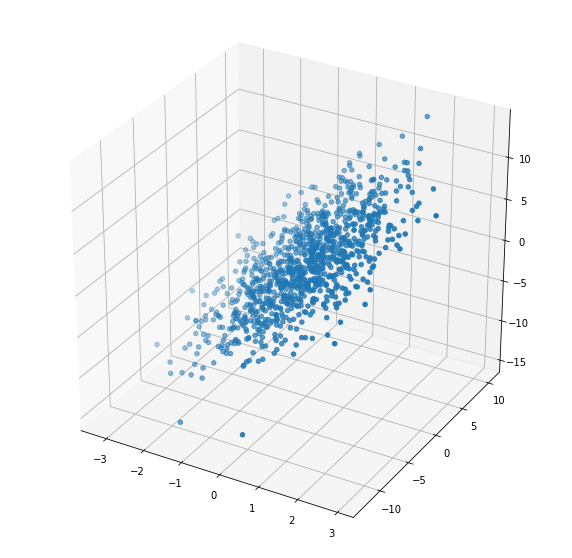

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'] , marker='o')

Eigenvalues
 [27.5972 -0.      1.9206] 

Eigenvectors
 [[-0.112  -0.8165  0.5664]
 [-0.5817 -0.4082 -0.7035]
 [-0.8056  0.4082  0.4293]] 



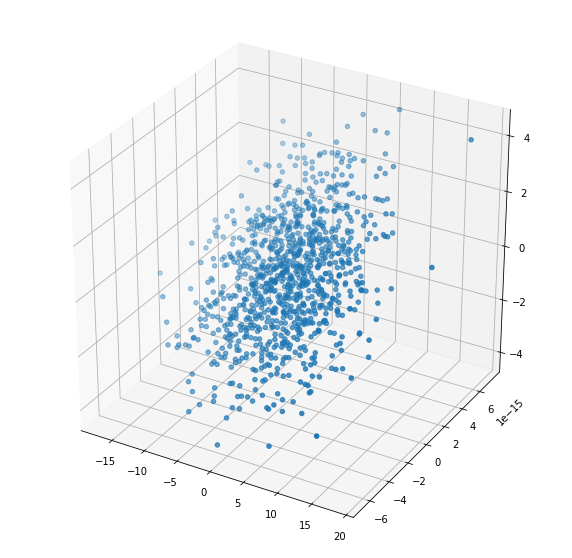

In [45]:
l0, V0 = np.linalg.eig(np.dot(df.T, df)/(N-1))
print("Eigenvalues\n", l0, '\n')
print("Eigenvectors\n", V0, '\n')
rdf = pd.DataFrame(np.dot(V0.T, df.T).T, columns=['rx1', 'rx2', 'rx3']) #rotated data
rdf
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(rdf['rx1'], rdf['rx2'], rdf['rx3'] , marker='o')

Text(0, 0.5, 'x3')

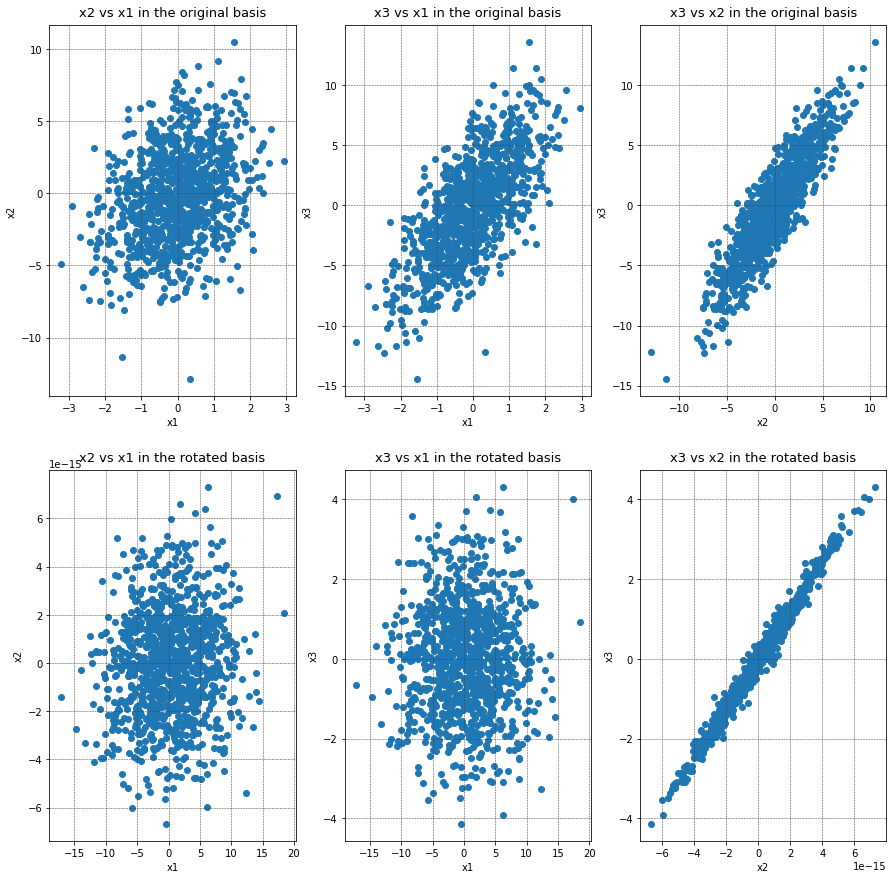

In [46]:
fig2 = plt.figure(figsize=(15,15))
gridsize=(2, 3)

ax01 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax01.scatter(x=df['x1'], y=df['x2'])
ax01.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax01.set_title("x2 vs x1 in the original basis", fontsize=13, verticalalignment='bottom')
ax01.set_xlabel("x1")
ax01.set_ylabel("x2")

ax02 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax02.scatter(x=df['x1'], y=df['x3'])
ax02.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax02.set_title("x3 vs x1 in the original basis", fontsize=13, verticalalignment='bottom')
ax02.set_xlabel("x1")
ax02.set_ylabel("x3")

ax12 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax12.scatter(x=df['x2'], y=df['x3'])
ax12.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax12.set_title("x3 vs x2 in the original basis", fontsize=13, verticalalignment='bottom')
ax12.set_xlabel("x2")
ax12.set_ylabel("x3")

axr01 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)
axr01.scatter(x=rdf['rx1'], y=rdf['rx2'])
axr01.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
axr01.set_title("x2 vs x1 in the rotated basis", fontsize=13, verticalalignment='bottom')
axr01.set_xlabel("x1")
axr01.set_ylabel("x2")

axr02 = plt.subplot2grid(gridsize, (1, 1), colspan=1, rowspan=1)
axr02.scatter(x=rdf['rx1'], y=rdf['rx3'])
axr02.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
axr02.set_title("x3 vs x1 in the rotated basis", fontsize=13, verticalalignment='bottom')
axr02.set_xlabel("x1")
axr02.set_ylabel("x3")

axr12 = plt.subplot2grid(gridsize, (1, 2), colspan=1, rowspan=1)
axr12.scatter(x=rdf['rx2'], y=rdf['rx3'])
axr12.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
axr12.set_title("x3 vs x2 in the rotated basis", fontsize=13, verticalalignment='bottom')
axr12.set_xlabel("x2")
axr12.set_ylabel("x3")

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

A.trace(): 29.459858008103467
Lambda.trace(): 29.45985800810346
First principal component explains 93.46692316432647 % of the dataset's total variability
Second principal component explains 6.519278252968763 % of the dataset's total variability
First plus second principal components explain 99.98620141729523 % of the dataset's total variability
Eigenvalues
 [27.5972  1.9206 -0.      0.0005  0.0005  0.0004  0.0004  0.0004  0.0004
  0.0004  0.0004  0.0004  0.0004] 

Eigenvectors
 [[-0.112  -0.5664 -0.8165  0.     -0.0002 -0.0001  0.0005  0.0001 -0.0002
   0.      0.     -0.0001 -0.    ]
 [-0.5817  0.7035 -0.4082  0.      0.0003  0.0001 -0.0005 -0.0003  0.0003
  -0.0002 -0.      0.0002  0.0003]
 [-0.8056 -0.4293  0.4082  0.0001 -0.0002 -0.      0.0004 -0.0001 -0.0001
  -0.0002  0.0001 -0.      0.0003]
 [-0.0001 -0.0002  0.     -0.424  -0.3202  0.4281 -0.3161 -0.1728 -0.2746
  -0.0822 -0.0711  0.4669 -0.3154]
 [ 0.0001 -0.0003 -0.     -0.2349  0.2469  0.0544 -0.3929 -0.0381 -0.3029
   0.39

Text(0, 0.5, 'x3')

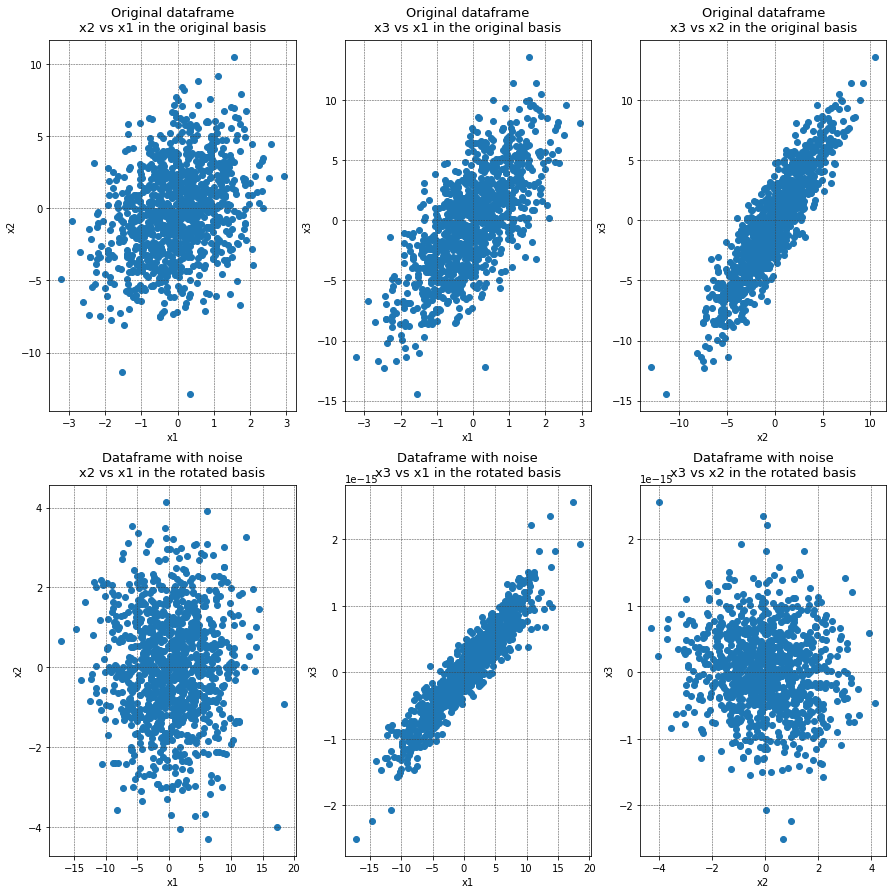

In [47]:
Df = df.copy()
for i in range(0, 10):
    num = str(i+4)
    col = 'x'+num
    Df[col] = np.random.normal(loc=0, scale=1/50, size=N)
#Df

covmatrix1 = np.cov(Df.T)
#print(Covmatrix)
U1, spectrum1, Vt1 = la.svd(covmatrix1)
#print ('New spectrum\n', spectrum1, '\n')
#print ('New U\n', U1, '\n')
#print ('New V transposed\n', Vt1, '\n')

Lambda1 = np.diag(spectrum1)

print("A.trace():", covmatrix1.trace())
print("Lambda.trace():", Lambda1.trace())

print("First principal component explains", 100*Lambda1[0,0]/Lambda1.trace(), "% of the dataset's total variability")
print("Second principal component explains", 100*Lambda1[1,1]/Lambda1.trace(), "% of the dataset's total variability")
print("First plus second principal components explain", (100*Lambda1[0,0]/Lambda1.trace())+(100*Lambda1[1,1]/Lambda1.trace()), "% of the dataset's total variability")

l01, V01 = np.linalg.eig(np.dot(Df.T, Df)/(N-1))
print("Eigenvalues\n", l01, '\n')
print("Eigenvectors\n", V01, '\n')
rDf = pd.DataFrame(np.dot(V01.T, Df.T).T, columns=['rx1', 'rx2', 'rx3', 'rx4', 'rx5', 'rx6', 'rx7', 'rx8', 'rx9', 'rx10', 'rx11', 'rx12', 'rx13']) #rotated data
#rDf

fig3 = plt.figure(figsize=(15,15))
gridsize=(2, 3)

ax011 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax011.scatter(x=Df['x1'], y=Df['x2'])
ax011.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax011.set_title("Original dataframe\nx2 vs x1 in the original basis", fontsize=13, verticalalignment='bottom')
ax011.set_xlabel("x1")
ax011.set_ylabel("x2")

ax021 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax021.scatter(x=Df['x1'], y=Df['x3'])
ax021.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax021.set_title("Original dataframe\nx3 vs x1 in the original basis", fontsize=13, verticalalignment='bottom')
ax021.set_xlabel("x1")
ax021.set_ylabel("x3")

ax121 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax121.scatter(x=Df['x2'], y=Df['x3'])
ax121.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax121.set_title("Original dataframe\nx3 vs x2 in the original basis", fontsize=13, verticalalignment='bottom')
ax121.set_xlabel("x2")
ax121.set_ylabel("x3")

axr011 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)
axr011.scatter(x=rDf['rx1'], y=rDf['rx2'])
axr011.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
axr011.set_title("Dataframe with noise\nx2 vs x1 in the rotated basis", fontsize=13, verticalalignment='bottom')
axr011.set_xlabel("x1")
axr011.set_ylabel("x2")

axr021 = plt.subplot2grid(gridsize, (1, 1), colspan=1, rowspan=1)
axr021.scatter(x=rDf['rx1'], y=rDf['rx3'])
axr021.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
axr021.set_title("Dataframe with noise\nx3 vs x1 in the rotated basis", fontsize=13, verticalalignment='bottom')
axr021.set_xlabel("x1")
axr021.set_ylabel("x3")

axr121 = plt.subplot2grid(gridsize, (1, 2), colspan=1, rowspan=1)
axr121.scatter(x=rDf['rx2'], y=rDf['rx3'])
axr121.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
axr121.set_title("Dataframe with noise\nx3 vs x2 in the rotated basis", fontsize=13, verticalalignment='bottom')
axr121.set_xlabel("x2")
axr121.set_ylabel("x3")


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 